## EDA and Extra Tree Regressor model with Mosquito Indicator Data  

data from: https://www.kaggle.com/datasets/kukuroo3/mosquito-indicator-in-seoul-korea



In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal


## Data summary

In [61]:

df = pd.read_csv("mosquito.csv")
df.columns = ['date', 'mosquito_indi', 'rain_mm', 'mean_t', 'min_t', 'max_t']
df.head()


,date,mosquito_indi,rain_mm,mean_t,min_t,max_t
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9


In [62]:
## see null data  
df.isnull().sum()

date             0
mosquito_indi    0
rain_mm          0
mean_t           0
min_t            0
max_t            0
dtype: int64

In [63]:
# We are goint to extract month and year from the date column 
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['month'] = pd.to_datetime(df['date']).dt.strftime('%m')
df= df.drop(['date'], axis=1)
df


,mosquito_indi,rain_mm,mean_t,min_t,max_t,year,month
0,254.4,0.0,18.8,12.2,26.0,2016,05
1,273.5,16.5,21.1,16.5,28.4,2016,05
2,304.0,27.0,12.9,8.9,17.6,2016,05
3,256.2,0.0,15.7,10.2,20.6,2016,05
4,243.8,7.5,18.9,10.2,26.9,2016,05
...,...,...,...,...,...,...,...
1337,5.5,0.0,-1.7,-4.6,2.6,2019,12
1338,5.5,0.0,1.1,-3.6,6.1,2019,12
1339,5.5,1.4,3.8,1.1,6.2,2019,12
1340,5.5,0.4,2.7,-5.7,6.8,2019,12


In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mosquito_indi,1342.0,251.991803,295.871336,0.0,5.5,91.9,480.400,1000.0
rain_mm,1342.0,3.539866,13.868106,0.0,0.0,0.0,0.400,144.5
mean_t,1342.0,14.166021,10.943990,-14.8,4.5,16.5,23.300,33.7
min_t,1342.0,10.005663,11.109489,-17.8,0.3,11.5,19.500,30.3
max_t,1342.0,19.096870,11.063394,-10.7,9.3,21.9,28.175,39.6


In [65]:
df.dtypes

mosquito_indi    float64
rain_mm          float64
mean_t           float64
min_t            float64
max_t            float64
year              object
month             object
dtype: object

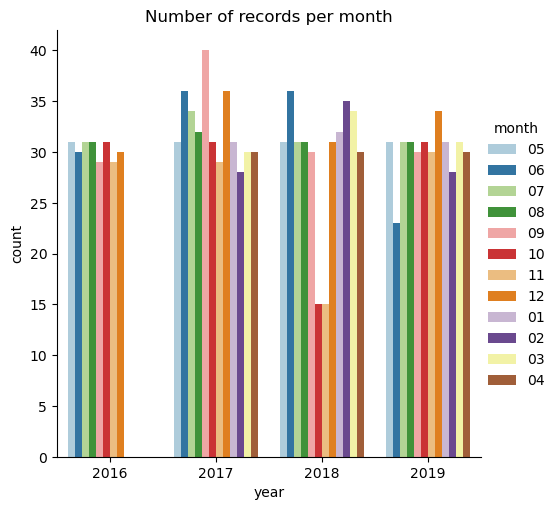

In [66]:

sns.catplot(df, x="year",hue="month", kind="count", palette="Paired")
plt.title("Number of records per month")
plt.show()

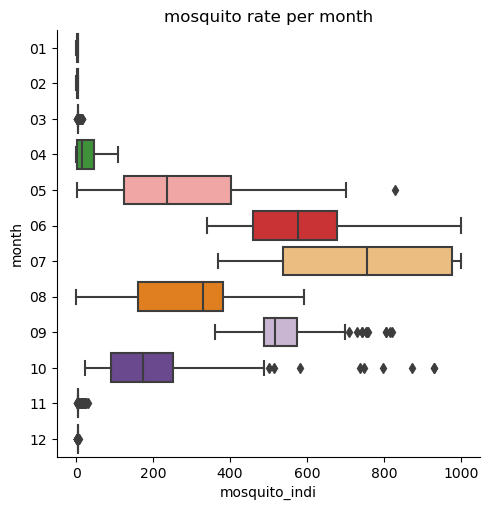

In [67]:
sns.catplot(df.sort_values("month"), x="mosquito_indi", y="month", kind="box", palette="Paired")
plt.title("mosquito rate per month")
plt.show()

In [133]:
##kruskall Wallis mosquito_rate between months 
mosquit_month=df[["month","mosquito_indi"]].pivot(columns="month",values="mosquito_indi")
kruskal(mosquit_month["01"],mosquit_month["02"],mosquit_month["03"],mosquit_month["04"],mosquit_month["05"],mosquit_month["06"],mosquit_month["07"]
        ,mosquit_month["08"],mosquit_month["09"],mosquit_month["10"],mosquit_month["11"],mosquit_month["12"],nan_policy="omit")

KruskalResult(statistic=1122.6126866570255, pvalue=7.65217581357824e-234)

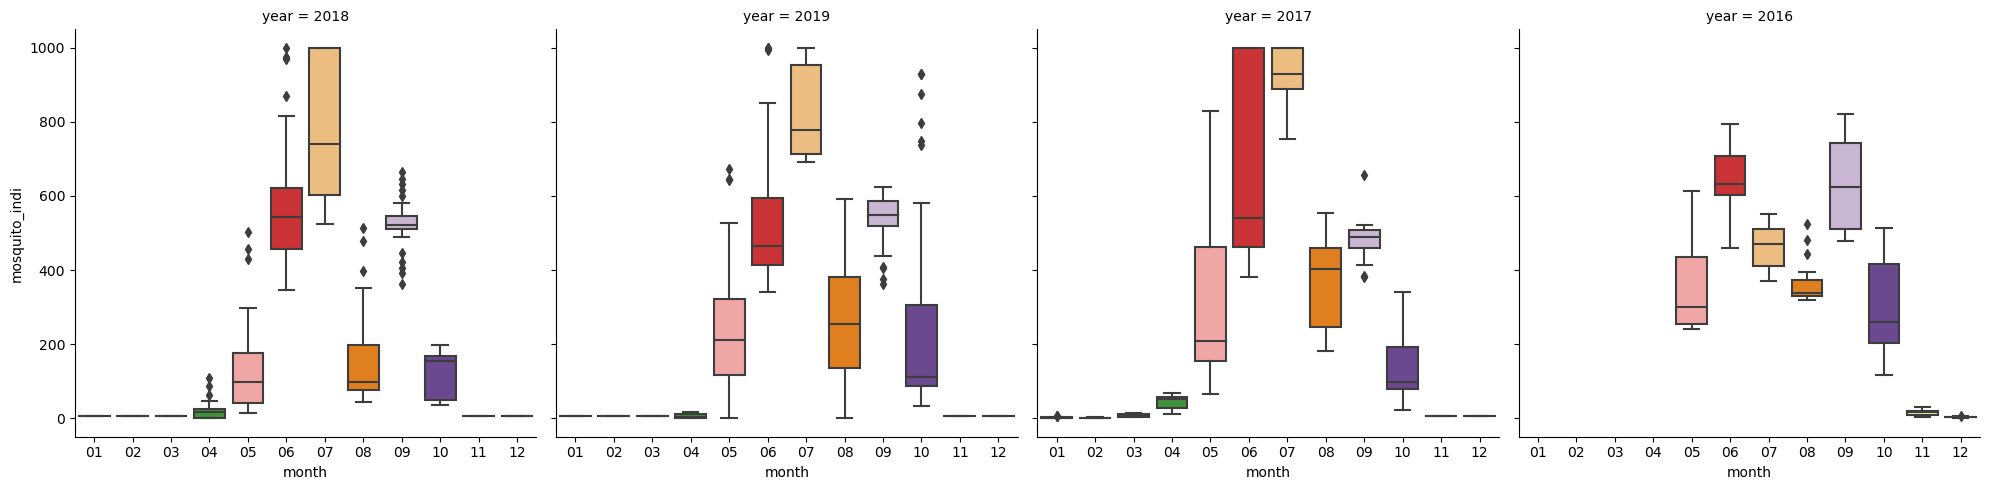

In [69]:
sns.catplot(df.sort_values(["month"]), x="month", y="mosquito_indi" ,col="year", kind="box", palette="Paired")
plt.show()
##jun and july the months with the highest rates of mosquitos

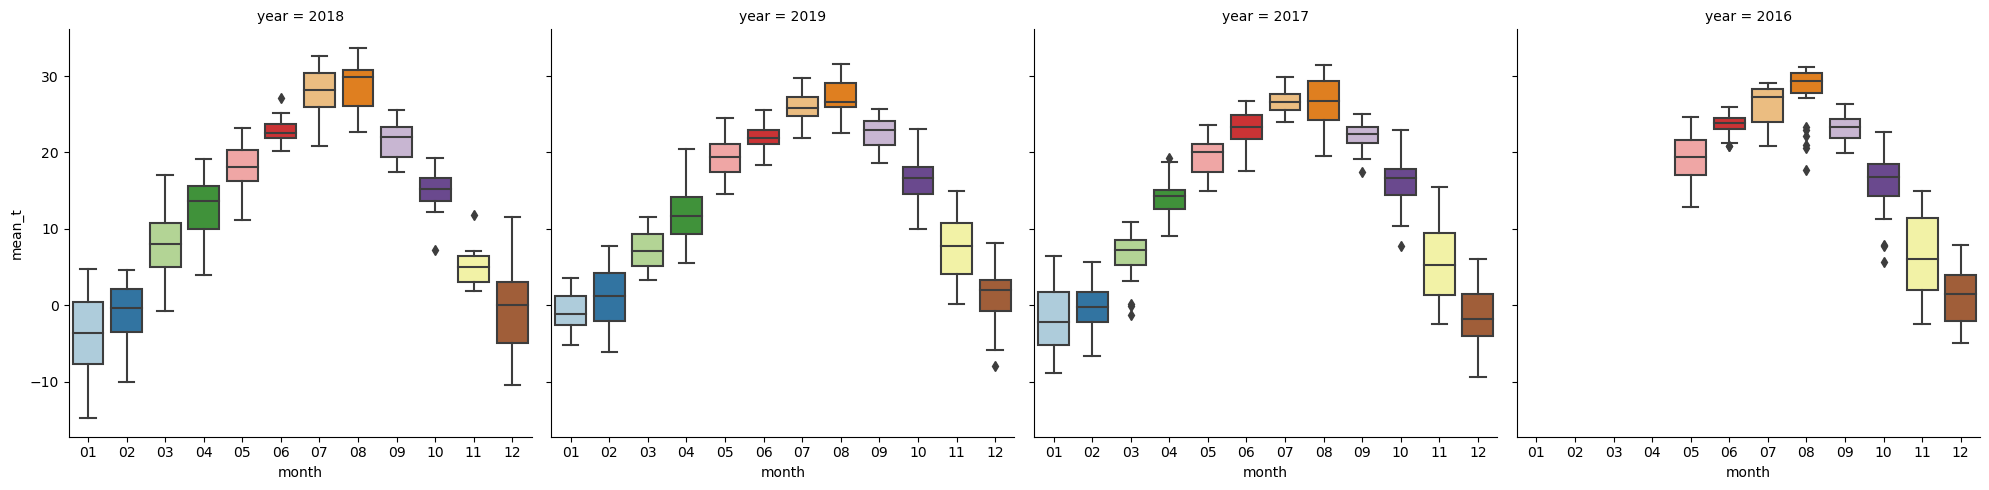

In [70]:
sns.catplot(df.sort_values(["month"]), x="month", y="mean_t" ,col="year", kind="box", palette="Paired")
plt.show()
###we can corroborate than the months with higher temperature present grater mosquito rate (months 5-10)

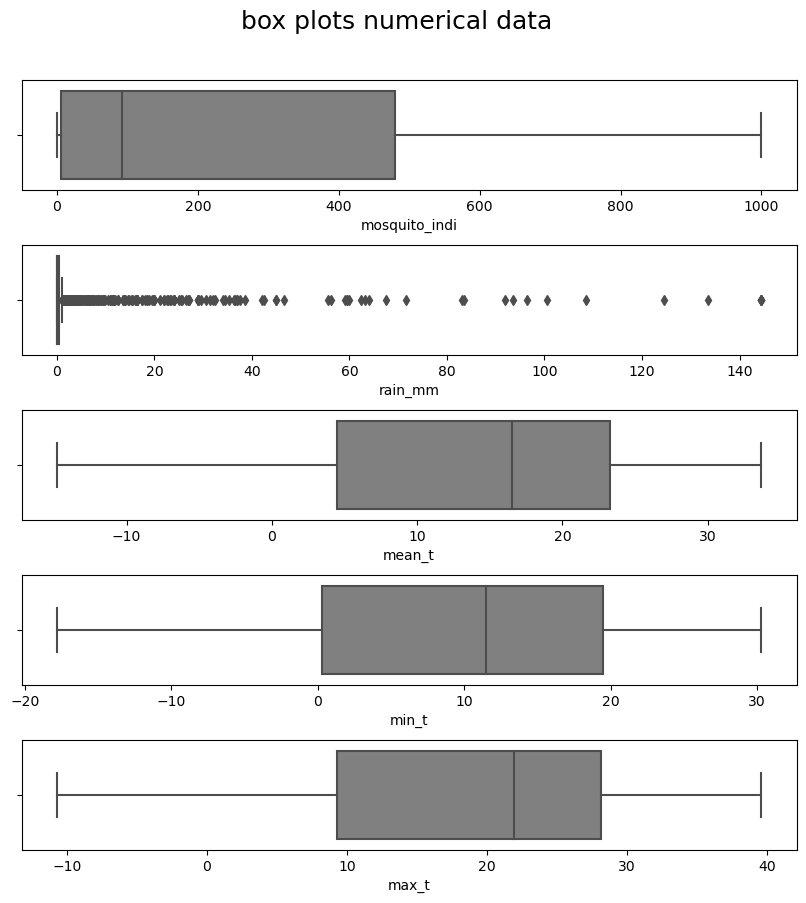

In [71]:
fig = plt.figure(figsize = (10,10))
fig.suptitle("box plots numerical data", fontsize=18, y=0.95)
numerical=[]
for col in df.columns:
    if df[col].dtypes == "float64":
        numerical.append(col)
for i,fet in enumerate(numerical):
    ax=fig.add_subplot(5,1,i+1)
    sns.boxplot(data=df, x=fet, ax=ax, color="grey")
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()



### Removing some outlayers from rain mm

In [72]:
from out_layers import remove_out_layers_from_df,table_outlayers

In [73]:
##check outlayers in all numerical data
table_outlayers(df,numerical)

,Number_out_layer
rain_mm,24
mosquito_indi,0
mean_t,0
min_t,0
max_t,0


In [74]:
##removing some outlayers from rain_mm
df_2=remove_out_layers_from_df(df,"rain_mm")

In [75]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
mosquito_indi,1318.0,245.723748,291.546771,0.0,5.500,84.9,470.8,1000.0
rain_mm,1318.0,1.956601,6.071046,0.0,0.000,0.0,0.2,46.5
mean_t,1318.0,14.012519,10.969403,-14.8,4.300,16.3,23.3,33.7
min_t,1318.0,9.807284,11.098710,-17.8,0.125,11.2,19.1,30.3
max_t,1318.0,18.994234,11.124065,-10.7,9.000,21.8,28.2,39.6


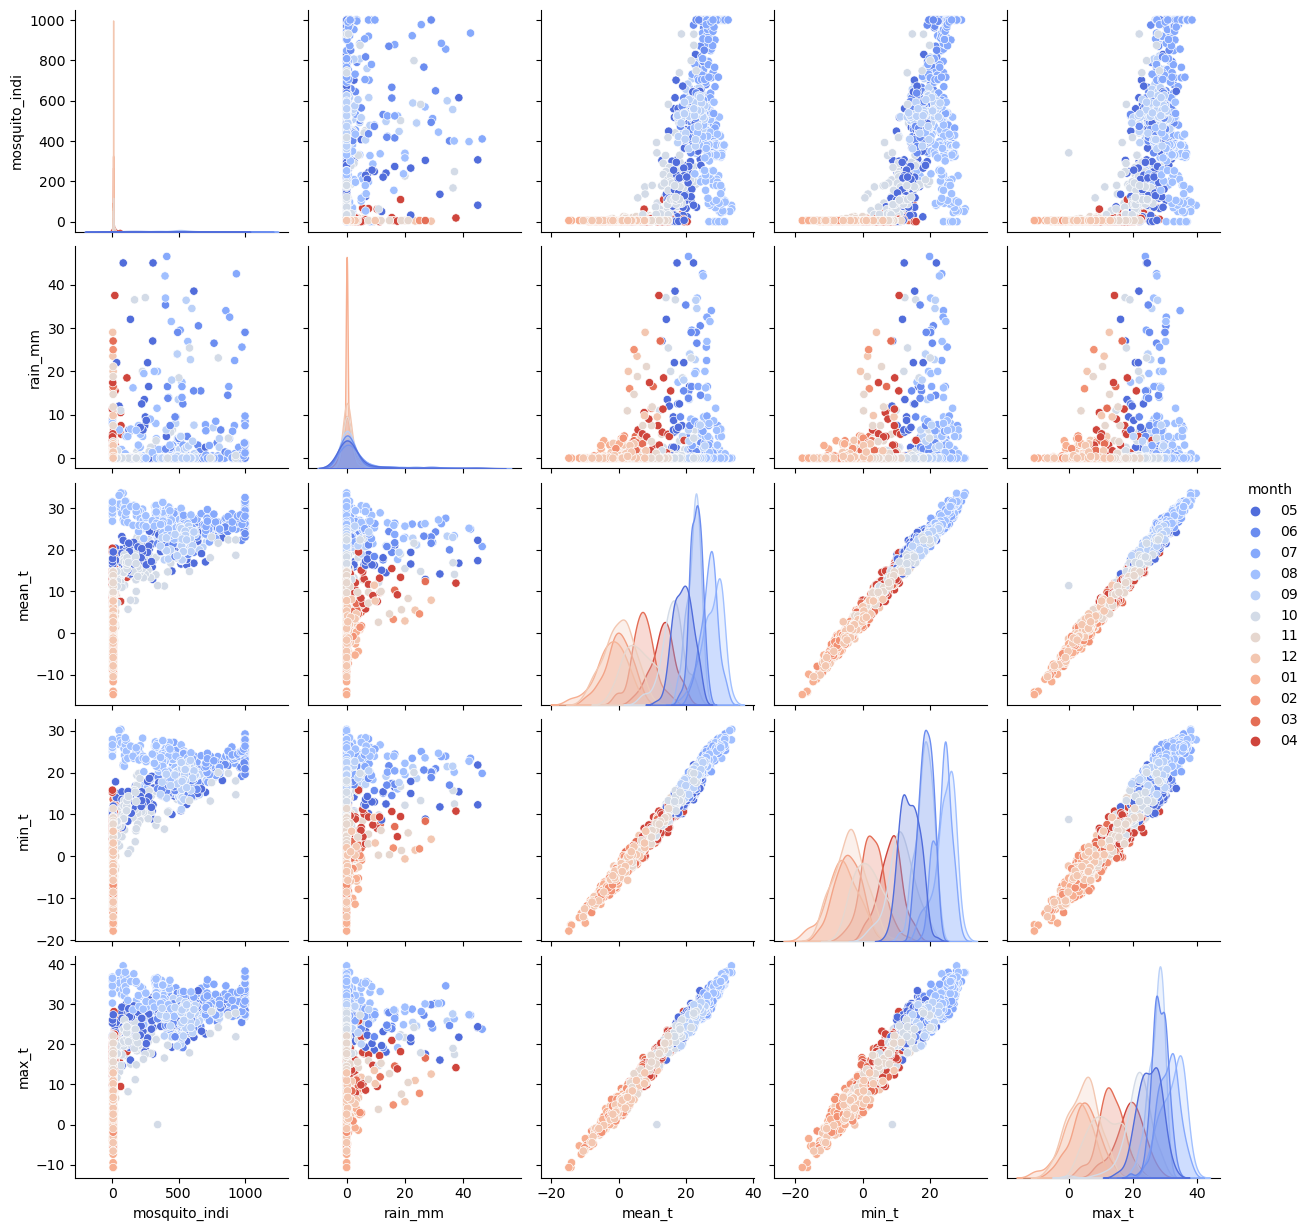

In [76]:
sns.pairplot(df_2, palette="coolwarm", hue="month")
plt.show()

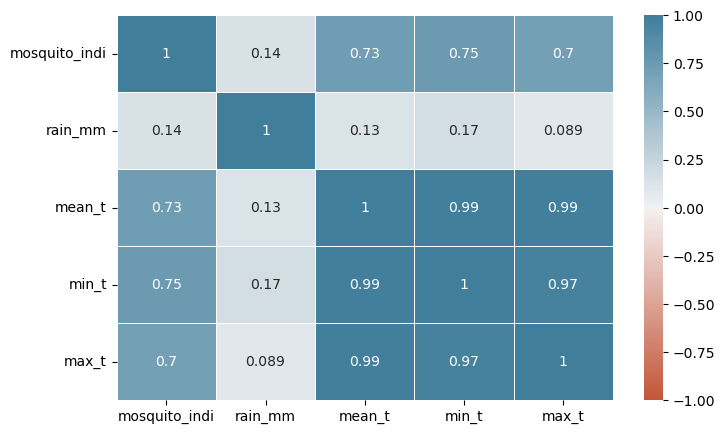

In [77]:
#Correlation matrix
fig = plt.figure(figsize = (8,5))
sns.heatmap(
    data=df_2.corr(numeric_only=True),
    cmap= sns.diverging_palette(20,230, as_cmap=True), 
    center=0,
    vmin=-1, 
    vmax=1,
    linewidths=0.5, 
    annot=True)
plt.show()
## as we already saw there is a positive correlation between temperature and mosquito rate  

# Preparing Data for model 

## Dummy transformation for month and year

In [78]:
df_transformed = pd.get_dummies(df_2, columns=['month','year']) 


In [79]:
df_transformed

,mosquito_indi,rain_mm,mean_t,min_t,max_t,month_01,month_02,month_03,month_04,month_05,...,month_07,month_08,month_09,month_10,month_11,month_12,year_2016,year_2017,year_2018,year_2019
0,254.4,0.0,18.8,12.2,26.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,273.5,16.5,21.1,16.5,28.4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,304.0,27.0,12.9,8.9,17.6,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,256.2,0.0,15.7,10.2,20.6,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,243.8,7.5,18.9,10.2,26.9,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,5.5,0.0,-1.7,-4.6,2.6,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1338,5.5,0.0,1.1,-3.6,6.1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1339,5.5,1.4,3.8,1.1,6.2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1340,5.5,0.4,2.7,-5.7,6.8,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


## Data scaling

In [80]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split  


In [81]:
X=df_transformed.drop(columns='mosquito_indi')
y = np.array(df_transformed['mosquito_indi']).reshape(-1, 1)

In [82]:
##transformation
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=.35)  
sc_x = StandardScaler().fit(X_train)    
sc_y = StandardScaler().fit(y_train) 

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)



## Model with ExtraTreeRegressor


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import cross_validate


In [84]:
param={"criterion":["squared_error", "absolute_error", "friedman_mse"],
    "max_features": list(range(1,21)),
       "min_samples_split":list(range(2, 16)),
       "min_samples_leaf":list(range(1, 10)),
      "max_depth":list(range(1, 35)),

       }


In [85]:
grid_reg = GridSearchCV(ExtraTreeRegressor(), param, cv=3).fit(X_train, y_train)


In [86]:
grid_reg.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 11,
 'max_features': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [87]:
model=grid_reg.best_estimator_

In [88]:
y_pred = model.predict(X_test) 

## CV of the model 

In [102]:
final_result = cross_validate(model, X_train, y_train, return_train_score=True, cv=5,)



In [143]:
print(f" mean train score:{np.mean(final_result['train_score'])}")
print(f" mean test score:{np.mean(final_result['test_score'])}")

 mean train score:0.9221416251758761
 mean test score:0.8526575356638995


# MSE, RMSE and R2 metrics

In [104]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = metrics.mean_squared_error(y_test,y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))
print("rmse: ", rmse.round(4))

r2  0.8818
mse:  0.1133
rmse:  0.3365


## Residual PLot

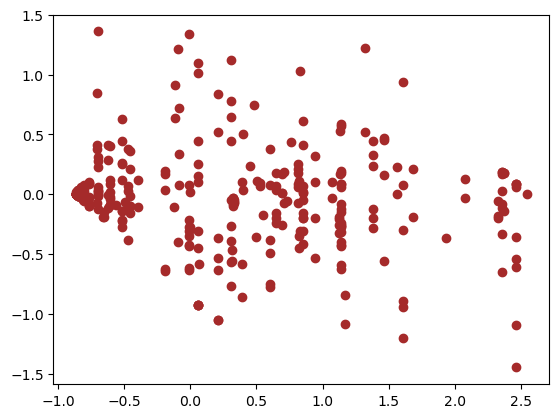

In [144]:
import numpy as np
residuals = np.subtract(y_test.reshape(-1), y_pred.reshape(-1)) 
plt.scatter(x=y_pred, y=residuals, color="brown")
plt.show()

In [134]:
y__predict_inverse=sc_y.inverse_transform(y_pred.reshape(-1, 1))
M_predicion= pd.DataFrame(y__predict_inverse)
M_predicion.rename(columns={0: "Mosquito_prediccion"}, inplace=True)
lol= pd.DataFrame(sc_y.inverse_transform(y_test.reshape(-1, 1)))
lol.rename(columns={0: "Mosquito_indi"}, inplace=True)

data_compare_predict= pd.concat([lol, M_predicion], axis=1)
data_compare_predict.tail(5)

,Mosquito_indi,Mosquito_prediccion
457,405.2,587.451351
458,248.5,197.900000
459,319.6,347.920000
460,1000.0,975.644444
461,160.9,251.060000


### Comparing Cumulative Distribution Function of predicted and actual values   

<Axes: ylabel='Proportion'>

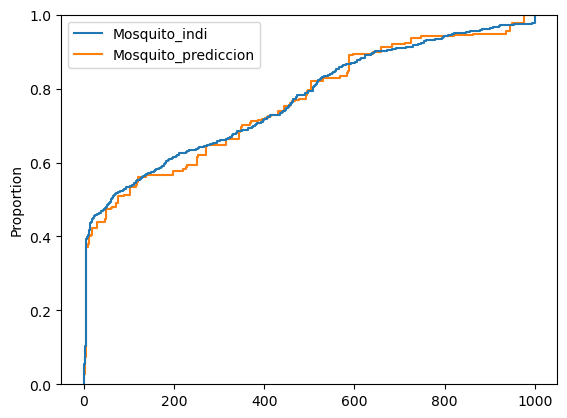

In [139]:
sns.ecdfplot(
    data=data_compare_predict)

In [107]:
import session_info
session_info.show()